In [ ]:
import pandas as pd
import numpy as np
import datetime
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk_pre
from sklearn.decomposition import PCA
df = pd.read_csv("snoasis.csv")
temps = pd.read_csv('Temp for 2023 Ada.csv')

In [ ]:
df

,Date,Time,Staff,Receipt number,Name,Variant,Unit,Quantity,Price (USD),Discount (USD),Subtotal (USD),Tax Info Available,Is Tax Exempt,Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment
0,2/28/2023,7:50:56 PM,SnOasis Main,1,Gift card,NaN,NaN,1,1.0,0.0,1.0,No,No,0.00,1.00,NaN,NaN,0.0,NaN
1,2/28/2023,7:52:12 PM,SnOasis Main,2,Gift card,NaN,NaN,1,1.0,0.0,1.0,No,No,0.00,1.00,NaN,NaN,0.0,NaN
2,2/28/2023,7:58:14 PM,SnOasis Main,3,Gift card,NaN,NaN,1,1.0,0.0,1.0,No,No,0.00,1.00,NaN,NaN,0.0,NaN
3,2/28/2023,8:21:15 PM,SnOasis Main,4,Candy Bar,NaN,NaN,1,1.5,0.0,1.5,Yes,No,0.14,1.64,NaN,NaN,0.0,NaN
4,2/28/2023,9:29:15 PM,SnOasis East,5,Gift card,NaN,NaN,1,1.0,0.0,1.0,No,No,0.00,1.00,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76214,11/5/2023,5:42:06 PM,SnOasis Main,37192,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN
76215,11/5/2023,5:44:05 PM,SnOasis Main,37193,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN
76216,11/5/2023,5:48:20 PM,SnOasis Main,37194,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN
76217,11/5/2023,5:51:32 PM,SnOasis Main,37195,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN


In [ ]:
df.groupby("Date")

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
#df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df['month'] = df['Date'].apply(lambda x: "%d" % (x.month))

In [ ]:
freqs = collections.Counter(df["month"])

In [ ]:
freqs

Counter({'2': 13,
         '3': 10732,
         '4': 12142,
         '5': 13172,
         '6': 13380,
         '7': 12061,
         '8': 8836,
         '9': 4147,
         '10': 1649,
         '11': 87})

In [ ]:
df_days_grouped = df.groupby('Date', as_index=False).sum()

<ipython-input-455-b6e6c9680d8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_days_grouped = df.groupby('Date', as_index=False).sum()


In [ ]:
df_days_grouped['weekday'] = df_days_grouped['Date'].apply(lambda x: "%d" % (x.weekday()))

In [ ]:
df['weekday'] = df['Date'].apply(lambda x: "%d" % (x.weekday()))

In [ ]:
df_days_grouped

,Date,Receipt number,Variant,Unit,Quantity,Price (USD),Discount (USD),Subtotal (USD),Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment,weekday
0,2023-02-28,78,0.0,0.0,13,19.75,0.0,24.75,1.01,20.76,0.0,0.0,0.0,0.0,1
1,2023-03-02,239,0.0,0.0,7,17.50,0.0,19.50,0.94,18.44,0.0,0.0,0.0,0.0,3
2,2023-03-04,80343,0.0,0.0,918,1519.25,0.0,4273.50,143.05,1662.30,0.0,0.0,0.0,0.0,5
3,2023-03-05,229641,0.0,0.0,993,1686.50,0.0,4459.25,158.87,1845.37,0.0,0.0,0.0,0.0,6
4,2023-03-06,346275,0.0,0.0,792,1374.75,-1.0,3405.75,128.59,1502.34,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2023-10-25,667336,0.0,0.0,24,50.25,0.0,94.75,4.72,54.97,0.0,0.0,0.0,0.0,2
232,2023-10-26,2411272,0.0,0.0,94,148.25,0.0,392.75,13.97,162.22,0.0,0.0,0.0,0.0,3
233,2023-10-27,631016,0.0,0.0,19,34.75,0.0,65.00,3.27,38.02,0.0,0.0,0.0,0.0,4
234,2023-11-04,1039676,0.0,0.0,45,95.25,0.0,191.75,8.96,104.21,0.0,0.0,0.0,0.0,5


In [ ]:
df_weekdays_grouped = df.groupby('weekday', as_index=False).sum()

<ipython-input-459-e2a82b64f4a3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekdays_grouped = df.groupby('weekday', as_index=False).sum()


In [ ]:
df_weekdays_grouped

,weekday,Receipt number,Variant,Unit,Quantity,Price (USD),Discount (USD),Subtotal (USD),Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment
0,0,187722359,0.0,0.0,15424,27303.02,-11.00,65198.81,2562.28,29854.30,0.0,0.0,0.0,0.0
1,1,194369793,0.0,0.0,15061,27275.75,-14.34,76113.23,2512.89,29774.30,0.0,0.0,0.0,0.0
2,2,211946056,0.0,0.0,16391,29349.00,0.00,75429.50,2721.12,32070.12,0.0,0.0,0.0,0.0
3,3,221535155,0.0,0.0,15643,27915.96,-3.67,64698.47,2619.05,30531.34,0.0,0.0,0.0,0.0
4,4,218963901,0.0,0.0,17283,31534.25,-16.50,73781.00,2959.44,34477.19,0.0,0.0,0.0,0.0
5,5,214079723,0.0,0.0,18801,33860.41,-10.97,83235.72,3187.81,37037.25,0.0,0.0,0.0,0.0
6,6,154030011,0.0,0.0,12961,23081.00,-9.17,57595.65,2172.16,25243.99,0.0,0.0,0.0,0.0


<BarContainer object of 7 artists>

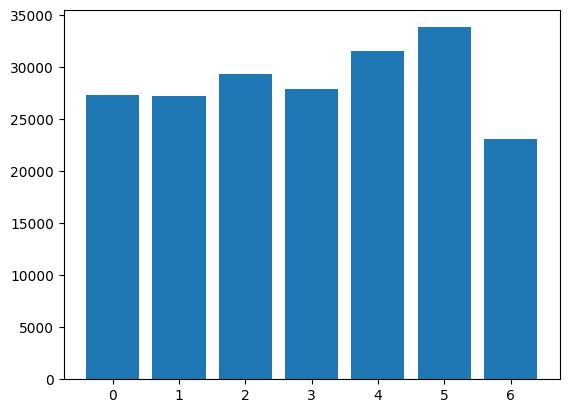

In [ ]:
plt.bar(df_weekdays_grouped['weekday'],df_weekdays_grouped['Price (USD)'])

<BarContainer object of 236 artists>

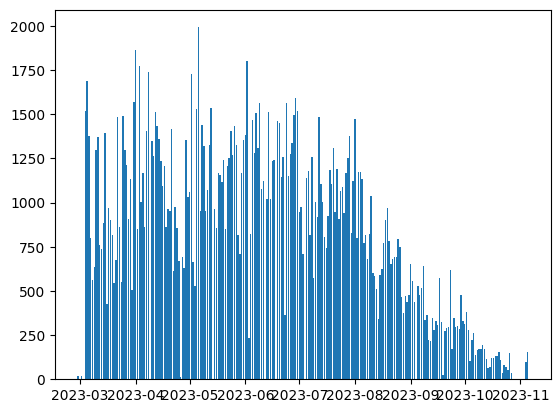

In [ ]:
plt.bar(df_days_grouped['Date'],df_days_grouped['Price (USD)'])

In [ ]:
weekday_freqs = collections.Counter(df_days_grouped["weekday"])
weekday_freqs

Counter({'1': 34, '3': 35, '5': 35, '6': 32, '0': 32, '2': 34, '4': 34})

In [ ]:
temps['DATE'] = pd.to_datetime(temps[['YEAR', 'MONTH', 'DAY']])

In [ ]:
temps

,YEAR,MONTH,DAY,STID,TMAX,TMIN,TAVG,HAVG,RAIN,RMAX,DATE
0,2023,1,1,ADAX,76.53,45.08,60.34,61.93,0.0,0.0,2023-01-01
1,2023,1,2,ADAX,71.62,54.34,64.21,86.50,0.0,0.0,2023-01-02
2,2023,1,3,ADAX,58.51,34.37,50.27,50.10,0.0,0.0,2023-01-03
3,2023,1,4,ADAX,53.89,27.37,40.20,61.00,0.0,0.0,2023-01-04
4,2023,1,5,ADAX,58.39,28.90,40.38,56.05,0.0,0.0,2023-01-05
...,...,...,...,...,...,...,...,...,...,...,...
361,2023,12,28,ADAX,44.52,28.97,35.42,62.52,0.0,0.0,2023-12-28
362,2023,12,29,ADAX,54.41,27.84,37.99,66.37,0.0,0.0,2023-12-29
363,2023,12,30,ADAX,63.46,28.07,42.63,58.34,0.0,0.0,2023-12-30
364,2023,12,31,ADAX,52.11,29.51,39.94,69.01,0.0,0.0,2023-12-31


In [ ]:
df_days_grouped = df_days_grouped.rename(columns={'Date': 'DATE'})

In [ ]:
merged_df = pd.merge(df_days_grouped, temps, on='DATE')

In [ ]:
merged_df

,DATE,Receipt number,Variant,Unit,Quantity,Price (USD),Discount (USD),Subtotal (USD),Total tax collected (USD),Final price (USD),...,YEAR,MONTH,DAY,STID,TMAX,TMIN,TAVG,HAVG,RAIN,RMAX
0,2023-02-28,78,0.0,0.0,13,19.75,0.0,24.75,1.01,20.76,...,2023,2,28,ADAX,77.83,39.47,62.20,35.49,0.00,0.00
1,2023-03-02,239,0.0,0.0,7,17.50,0.0,19.50,0.94,18.44,...,2023,3,2,ADAX,62.20,42.67,51.09,77.94,0.55,0.36
2,2023-03-04,80343,0.0,0.0,918,1519.25,0.0,4273.50,143.05,1662.30,...,2023,3,4,ADAX,68.97,36.37,53.69,69.17,0.00,0.00
3,2023-03-05,229641,0.0,0.0,993,1686.50,0.0,4459.25,158.87,1845.37,...,2023,3,5,ADAX,76.39,49.69,63.13,54.33,0.00,0.00
4,2023-03-06,346275,0.0,0.0,792,1374.75,-1.0,3405.75,128.59,1502.34,...,2023,3,6,ADAX,78.15,46.32,64.30,56.81,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2023-10-25,667336,0.0,0.0,24,50.25,0.0,94.75,4.72,54.97,...,2023,10,25,ADAX,73.27,65.08,68.56,93.76,0.50,0.48
232,2023-10-26,2411272,0.0,0.0,94,148.25,0.0,392.75,13.97,162.22,...,2023,10,26,ADAX,80.01,66.45,71.25,85.62,0.00,0.00
233,2023-10-27,631016,0.0,0.0,19,34.75,0.0,65.00,3.27,38.02,...,2023,10,27,ADAX,75.36,52.34,62.78,87.10,0.40,1.20
234,2023-11-04,1039676,0.0,0.0,45,95.25,0.0,191.75,8.96,104.21,...,2023,11,4,ADAX,76.71,49.69,61.89,71.88,0.00,0.00


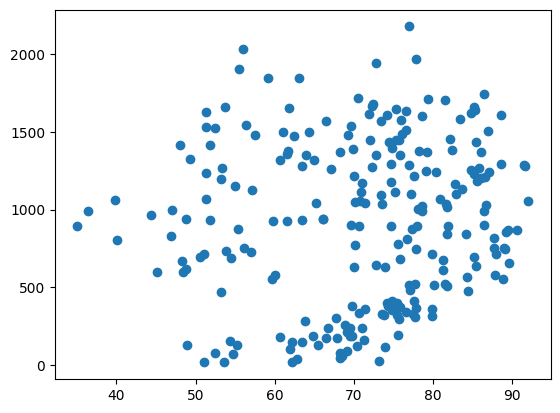

In [ ]:
plt.scatter(merged_df["TAVG"], merged_df["Final price (USD)"])

In [ ]:
df.columns

Index(['Date', 'Time', 'Staff', 'Receipt number', 'Name', 'Variant', 'Unit',
       'Quantity', 'Price (USD)', 'Discount (USD)', 'Subtotal (USD)',
       'Tax Info Available', 'Is Tax Exempt', 'Total tax collected (USD)',
       'Final price (USD)', 'SKU', 'Barcode', 'Cost price', 'Comment', 'month',
       'weekday'],
      dtype='object')

In [ ]:
df_sub = merged_df[["Price (USD)","MONTH","weekday","TAVG","RAIN","TMIN","TMAX"]]

In [ ]:
df_sub

,Price (USD),MONTH,weekday,TAVG,RAIN,TMIN,TMAX
0,19.75,2,1,62.20,0.00,39.47,77.83
1,17.50,3,3,51.09,0.55,42.67,62.20
2,1519.25,3,5,53.69,0.00,36.37,68.97
3,1686.50,3,6,63.13,0.00,49.69,76.39
4,1374.75,3,0,64.30,0.00,46.32,78.15
...,...,...,...,...,...,...,...
231,50.25,10,2,68.56,0.50,65.08,73.27
232,148.25,10,3,71.25,0.00,66.45,80.01
233,34.75,10,4,62.78,0.40,52.34,75.36
234,95.25,11,5,61.89,0.00,49.69,76.71


In [ ]:
features = ['MONTH','weekday','TAVG','RAIN','TMIN','TMAX']
x = df_sub.loc[:,features].values
y = df_sub.loc[:,['Price (USD)']].values
x = sk_pre.StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,2.098344,0.404273
1,3.042091,0.876145
2,2.778690,-1.106149
3,1.525706,-1.319208
4,1.560021,0.812736
...,...,...
231,-0.211231,1.205266
232,-0.770268,-0.232271
233,0.442259,0.118892
234,0.279751,-1.168051


In [ ]:
finalDf = pd.concat([principalDf, df_sub[['Price (USD)']]], axis = 1)
finalDf['price_bin'] = pd.qcut(finalDf['Price (USD)'], q=5, labels=False)
df_sub['price_bin'] = pd.qcut(df_sub['Price (USD)'], q=5, labels=False)

<ipython-input-475-c87a8036203f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['price_bin'] = pd.qcut(df_sub['Price (USD)'], q=5, labels=False)


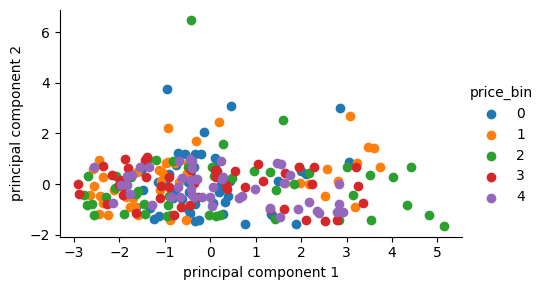

In [ ]:
fg = sns.FacetGrid(data=finalDf, hue='price_bin', aspect=1.61)
fg.map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()

In [ ]:
finalDf[["Price (USD)","price_bin"]]

,Price (USD),price_bin
0,19.75,0
1,17.50,0
2,1519.25,4
3,1686.50,4
4,1374.75,4
...,...,...
231,50.25,0
232,148.25,0
233,34.75,0
234,95.25,0


In [ ]:
from sklearn.model_selection import train_test_split

x_data = df_sub[['MONTH','weekday','TAVG','RAIN']]
y_data = df_sub[['Price (USD)']]

In [ ]:
train_img, test_img, train_lbl, test_lbl = train_test_split( x_data, y_data, test_size=1/7.0, random_state=0)

In [ ]:
#scaler = sk_pre.StandardScaler()

#scaler.fit(train_img)

In [ ]:
#train_img = scaler.transform(train_img)

In [ ]:
#test_img = scaler.transform(test_img)

In [ ]:
#pca = PCA(.95)

In [ ]:
#pca.fit(train_img)

In [ ]:
#PC_values = np.arange(pca.n_components_) + 1
#plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
#plt.title('Scree Plot')
#plt.xlabel('Principal Component')
#plt.ylabel('Variance Explained')
#plt.show()

In [ ]:
#train_img = pca.transform(train_img)
#test_img = pca.transform(test_img)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
#logisticRegr.fit(train_img, train_lbl)

In [ ]:
#logisticRegr.predict(test_img[0].reshape(1,-1))

In [ ]:
#logisticRegr.score(test_img, test_lbl)

In [ ]:
regr = RandomForestRegressor()
regr.fit(train_img,train_lbl)

<ipython-input-518-d2d3c00981c4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(train_img,train_lbl)


RandomForestRegressor()

In [ ]:
regr.score(test_img,test_lbl)

0.8448204455347498

x_data = df_sub[['MONTH','weekday','TAVG','RAIN']]

In [ ]:
regr.predict([[7,5,90,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1274.8375])